In [11]:
import logging
import argparse
import os
import sys
from matplotlib import pyplot as plt
import torch
import torch.nn as nn

from rl.networks.envs import make_vec_envs
from rl.evaluation import evaluate
from rl.networks.model import Policy

from crowd_sim import *
from importlib import import_module
import basic_arguments as args_module 
import trained_models.GST_predictor_rand.configs.config as Config

### Installation Instructions


##### pip install -r requirements.txt
##### Install Pytorch 1.12.1 

##### Install OpenAI Baselines

##### git clone https://github.com/openai/baselines.git
##### cd baselines
##### pip install -e .
##### Install Python-RVO2 library

In [12]:
model_dir = 'trained_models/GST_predictor_rand'
visualize = False
test_case = -1
checkpoint = '41665.pt'
render_traj = False
save_slides = False

In [13]:

args_dict = args_module.return_args()

algo_args = argparse.Namespace(**args_dict)


In [14]:
model_dir_string = model_dir.replace('/', '.') + '.configs.config'
model_arguments = import_module(model_dir_string)
Config = getattr(model_arguments, 'Config')
env_config = config = Config()

In [15]:
log_file = os.path.join(model_dir,'test')
if not os.path.exists(log_file):
    os.mkdir(log_file)
if visualize:
    log_file = os.path.join(model_dir, 'test', 'test_visual.log')
else:
    log_file = os.path.join(model_dir, 'test', 'test_' + checkpoint + '.log')
file_handler = logging.FileHandler(log_file, mode='w')
stdout_handler = logging.StreamHandler(sys.stdout)
level = logging.INFO
logging.basicConfig(level=level, handlers=[stdout_handler, file_handler],
                    format='%(asctime)s, %(levelname)s: %(message)s', datefmt="%Y-%m-%d %H:%M:%S")

In [16]:
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = False
device = torch.device("cpu")

2024-05-07 16:20:26, INFO: human number: 20
2024-05-07 16:20:26, INFO: Randomize human's radius and preferred speed
2024-05-07 16:20:26, INFO: Circle width: 8.485281374238571
2024-05-07 16:20:26, INFO: robot FOV 6.283185
2024-05-07 16:20:26, INFO: humans FOV 6.283185
<Monitor<CrowdSimPredRealGST<CrowdSimPredRealGST-v0>>>
No ghost version.
new gst
new st model
LOADED MODEL
device:  cpu


Reward=tensor([-14.4325])
Episode 0 ends in 33
Collision

Reward=tensor([-24.9076])
Episode 1 ends in 41
Collision

Reward=tensor([29.3064])
Episode 2 ends in 44
Success

Reward=tensor([36.3080])
Episode 3 ends in 49
Success

Reward=tensor([38.1377])
Episode 4 ends in 57
Success

Reward=tensor([34.4941])
Episode 5 ends in 65
Success
2024-05-07 16:20:46, INFO: Testing success rate: 0.67, collision rate: 0.33, timeout rate: 0.00, nav time: 13.19, path length: 17.62, average intrusion ratio: 8.78%, average minimal distance during intrusions: 0.39
2024-05-07 16:20:46, INFO: Collision cases: 0 1
2024-05-07 1

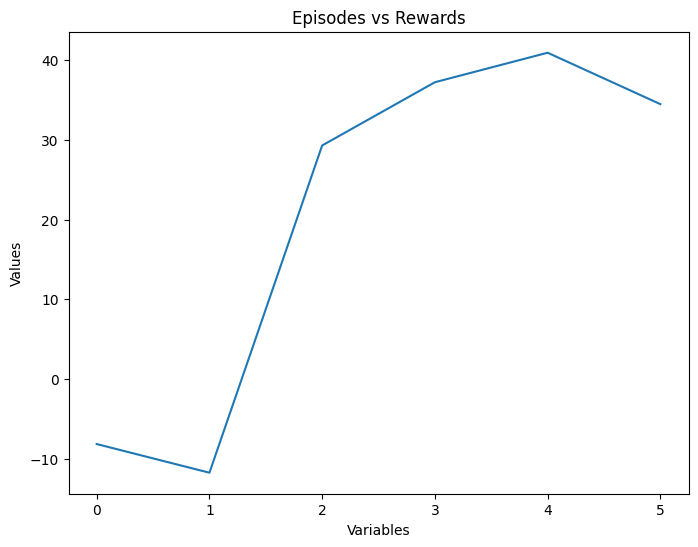

Object Detected!


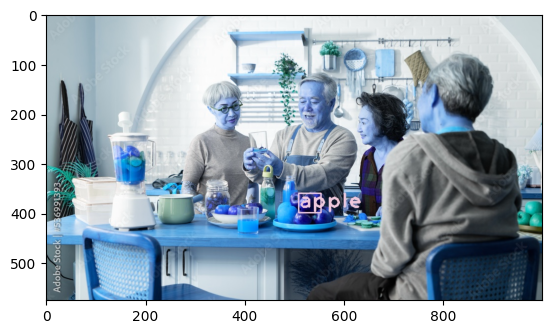

In [18]:
if visualize:
		fig, ax = plt.subplots(figsize=(7, 7))
		ax.set_xlim(-6.5, 6.5) # 6
		ax.set_ylim(-6.5, 6.5)
		ax.axes.xaxis.set_visible(False)
		ax.axes.yaxis.set_visible(False)
		plt.ion()
		#plt.show()
else:
		ax = None

visualize = False
load_path=os.path.join(model_dir,'checkpoints', checkpoint)


env_name = algo_args.env_name

eval_dir = os.path.join(model_dir,'eval')
if not os.path.exists(eval_dir):
    os.mkdir(eval_dir)

env_config.render_traj = render_traj
env_config.save_slides = save_slides
env_config.save_path = os.path.join(model_dir, 'social_eval', checkpoint[:-3])
envs = make_vec_envs(env_name, algo_args.seed, 1,
                     algo_args.gamma, eval_dir, device, allow_early_resets=True,
                     config=env_config, ax=ax, test_case=test_case, pretext_wrapper=config.env.use_wrapper)

actor_critic = Policy(
			envs.observation_space.spaces,
			envs.action_space,
			base_kwargs=algo_args,
			base=config.robot.policy)
actor_critic.load_state_dict(torch.load(load_path, map_location=device))
actor_critic.base.nenv = 1

test_size = 6

evaluate(actor_critic, envs, 1, device, test_size, logging, config, algo_args, visualize)

## Below are simulation videos for tech only and Socially Cognizant Solutions

### recorded video of simulations for Technology Only Solution. These can be seen runtime by running test.py

<video controls src="CrowdNavigationTechOnly.mov" width="720" height="720" />

## Below is the recorded video of simulations for a Socially Cognizant Robot. These can be seen runtime by running test.py

<video controls src="CrowdNavigation.mov" width="720" height="720" />